# 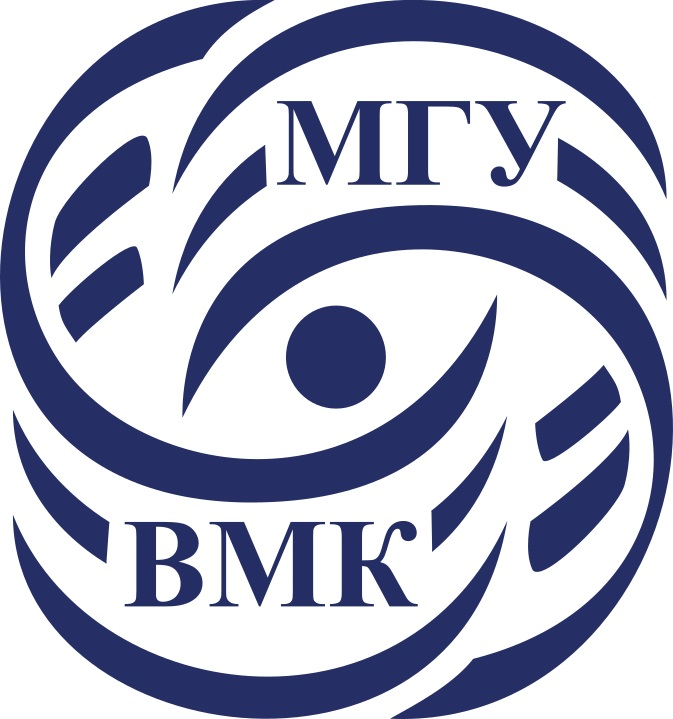

# Машинное обучение. ВМК МГУ

# Практическое задание 6: Ансамбли
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

__В этом задании вы:__

- Исследуете различные методы ансамблирования разных алгоритмов
- Поработаете с одним из самых мощных алгоритмов машинного обучения - Random Forest (случайными лесами)
- Порешаете интересную физическую задачку :)

-------
<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
# ! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
# ! pip install -r /content/requirements_2024_25_for_colab_small.txt

Проверим версию библиотеки:

In [411]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

Привет, ребятушки!

Сегодняшний ноутбук посвящен методам ансамблирования.

<font color='CornflowerBlue'>**Ансамбли**</font> - это техника, при которой несколько моделей объединяются для получения более точных результатов. Основная идея заключается в том, что объединение нескольких "плохих" моделей может привести к получению одной, но очень хорошей модели, ведь [соответствующая теорема](https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem) обещает нам, что это возможно.
Существует несколько популярных подходов к ансамблированию. С базовыми методами мы познакомимся в данном ноутбуке. А основному методу ансамблирования, градиентному бустингу, будет посвящено отдельное задание!

**<font color='red'>Внимание!</font> При решении задач разрешается использовать ``n_jobs`` для ускорения обучения.**

Импортируем необходимые библиотеки:

In [412]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

#####
# если Вы не различаете предлагаемые цвета, то Вы можете раскомментить строку ниже
# для применения специальной цветовой палитры или аналогичных
# plt.style.use('tableau-colorblind10')
#####

import numpy as np

import time
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



Напишем функцию для генерации датасета и оценки модели. Для экспериментов возьмем классический датасет по классификации рукописных цифр. Чтобы сделать задачу более интересной поместим в обучающее множество всего 10% от всего датасета.

In [413]:
def get_dataset():
    """Return the splits of the dataset for training and testing"""
    X, y = load_digits(return_X_y=True)
    return train_test_split(X, y, random_state=42, train_size=0.1)

X_train, X_test, y_train, y_test = get_dataset()

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# Комитет большинства

Начнем знакомство с ансамблями с самого простого подхода - комитета большинства.

<font color='CornflowerBlue'>**Комитет большинства**</font> — это метод ансамблевого обучения, который объединяет предсказания нескольких базовых моделей для улучшения общей производительности. Он работает по принципу голосования: каждая из базовых моделей (например, деревья решений, логистическая регрессия и т.д.) делает свои предсказания, а комитет большинства агрегирует эти результаты.

Существует два основных типа голосования:

1. "hard voting" (жесткое голосование), где итоговый класс выбирается на основе большинства голосов,
2. "soft voting" (мягкое голосование), где учитываются вероятности предсказаний моделей, и класс с наивысшей средней вероятностью становится итоговым предсказанием.

Такой подход позволяет снизить вероятность ошибок, поскольку объединение различных моделей может компенсировать слабости каждой из них, что в конечном итоге приводит к более надежным и точным предсказаниям.

## <font color='DarkOrange'>**Задание 1 [0.5 балла]**</font>

**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``LogisticRegression`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Обучить модель `VotingClassifier` со следующими алгоритмами: `LogisticRegression`, `KNeighborsClassifier` и `DecisionTreeClassifier` в двух режимах:

* hard voting
* soft voting

4. Сравните качество на тесте всех трех классификаторов. Сделайте вывод о пользе комитета большинства.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов, кроме явно обозначенных для перебора

In [231]:
regr = LogisticRegression()
res_regr = evaluate_model(regr)
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
eclf_hard  = VotingClassifier(estimators=[
                                ('lr', clf1), 
                                ('knn', clf2),
                                ('dt', clf3)],
                                voting='hard')

res_clf_hard = evaluate_model(eclf_hard)
eclf_soft  = VotingClassifier(estimators=[
                                ('lr', clf1), 
                                ('knn', clf2),
                                ('dt', clf3)],
                                voting='soft')

res_clf_soft = evaluate_model(eclf_soft)
print("Точноть при логистической регрессии {}".format(res_regr))
print(f"Точность ансамбля с режимом hard voting {res_clf_hard}")
print(f"Точность ансамбля с режимом soft voting {res_clf_soft}")



Точноть при логистической регрессии 0.9171817058096415
Точность ансамбля с режимом hard voting 0.9147095179233622
Точность ансамбля с режимом soft voting 0.9097651421508035


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

У первого классификатора LogisticRegression точность =  $0.91718$ 

У второго (hard) =  $0.91470$ показал результат хуже, связано скорее всего с тем, что один из классификаторов показал результат хуже , что ухудщило общий результат

У третьего (soft)  = $0.90976$ худшая точность из трех

В эксперименте комитет из нескольких моделей (Voting Classifier) не всегда даёт улучшение по сравнению с лучшей отдельной моделью (LogisticRegression).
Hard Voting работает лучше Soft Voting, что может говорить о том, что в данной задаче вероятности предсказаний недостаточно хорошо откалиброваны.

# Бэггинг



<font color='CornflowerBlue'>**Бэггинг**</font> (bagging, или bootstrap aggregating) - это такой приём в машинном обучении, когда берется куча одинаковых моделей, где каждая модель обучалась на случайном подмножестве нашего датасета. В итоге, хоть каждая модель может ошибаться по-своему,  в среднем ошибки компенсируются, и итоговая предсказательная способность получается лучше, чем у каждой модели по отдельности.


## <font color='DarkOrange'>**Задание 2.1 [0.25 балла]**</font>

Верно ли, что random forest является чисто бэггингоим над деревьями решений? Или нет? Обоснуйте свой выбор

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Нет, деревья в random forest могут строиться не только на подмножестве датасета (берутся случайные объекты - строки), но и на подпространстве признаков random subspaces(когда берутся некоторые случайные признаки - столбцы), так что random forest не является чистым бэггингом. Кроме того, в random forest может быть использована  out-of-bag выборка для оценки качества модели.


## <font color='DarkOrange'>**Задание 2.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``DecisionTreeClassifier`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Взять класс ``BaggingClassifier``, являющийся стандартным методом `sklearn`, и создать два классификатора:

* один с использованием ``DecisionTreeClassifier`` в качестве базового метода,

* второй с использованием ``LogisticRegression``. В обоих случаях бэггинг должен содержать по 10 моделей. Оцените качество обеих моделей.
3. Возьмите стандартный классификатор ``RandomForestClassifier`` и оцените его качество.
4. Сравните качество всех четырех классификаторов. Сделайте вывод о пользе бэггинга.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов

In [60]:
dt = DecisionTreeClassifier()
dt_score = evaluate_model(dt)

bag_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)
bag_lr = BaggingClassifier(LogisticRegression(), n_estimators=10)
bag_dt_score, bag_lr_score = evaluate_model(bag_dt), evaluate_model(bag_lr) 

rf = RandomForestClassifier()
rf_score = evaluate_model(rf)
print("Точность DecisionTreeClassifier: {}\nТочность бэггинга с DecisionTreeClassifier: {}\nТочность бэггинга с LogisticRegression: {}\nТочность RandomForestClassifier: {}\n".format(dt_score, bag_dt_score, bag_lr_score, rf_score))

Точность DecisionTreeClassifier: 0.6946847960444994
Точность бэггинга с DecisionTreeClassifier: 0.8207663782447466
Точность бэггинга с LogisticRegression: 0.9184177997527813
Точность RandomForestClassifier: 0.9011124845488258



<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Bagging с Decision Tree (0.82076) – значительно улучшает качество по сравнению с одним деревом Decision Tree.

Bagging с Logistic Regression (0.9184) – показывает наилучший результат. То есть, в данном случае логистическая регрессия в ансамбле работает лучше.

Random Forest (0.9011) – улучшает результат по сравнению с одним деревом, но уступает бэггингу с логистической регрессией.

Бэггинг полезен и улучшает точность модели. (В нашем случае Бэггинг с Logistic Regression оказался лучшим, что означает, что на этом датасете логистическая регрессия в ансамбле лучше обобщает данные.)

## <font color='DarkOrange'>**Задание 2.3 [0.5 балла]**</font>
**Цели**: Сравнение `BaggingClassifier` над деревьями и `RandomForestClassifier` по качеству на тесте в зависимости от числа выбранных базовых алгоритмов.

1. Обучите `BaggingClassifier` над деревьями и `RandomForestClassifier`, перебирая кол-во базовых алгоритмов. Сетка должна содержать хотя бы 10 значений и покрывать диапазон от 1 до 500 деревьев

2. Получите качество на тесте (``evaluate_model``) и отобразите это графически в зависимости от числа базовых алгоритмов для двух типой моделей. Важно это сделать на одном полотне.

3. Сравните полученные графики. Какие выводы можно сделать о каждом алгоритме? Сравните результаты двух типов моделей друг с другом.

<font color='OrangeRed'>**Примечание**</font> - везде (кроме кол-ва базовых алгоритмов) берите дефолтные параметры классов

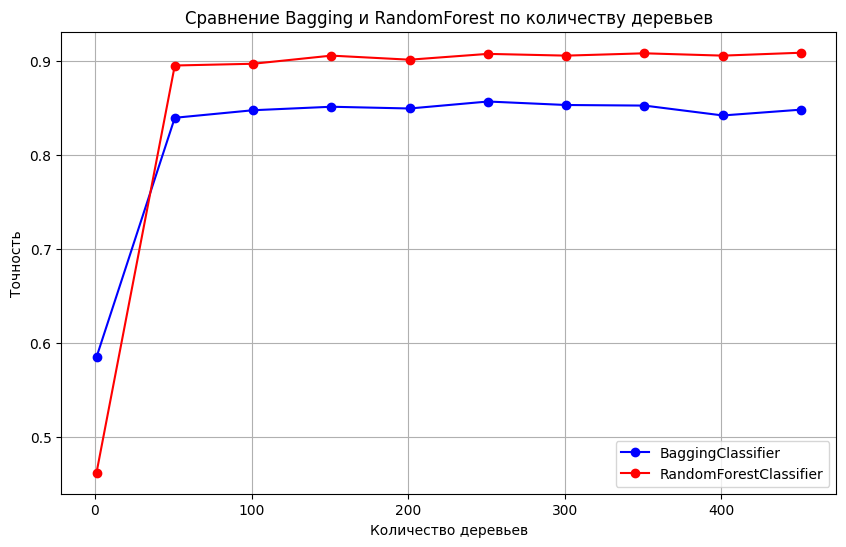

In [61]:
tree_counts = np.arange(1, 501, 50)
bagging_accuracies = []
random_forest_accuracies = []
for n_trees in tree_counts:
    bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n_trees)
    bagging_accuracy = evaluate_model(bagging_model)
    bagging_accuracies.append(bagging_accuracy)

    rf_model = RandomForestClassifier(n_estimators=n_trees)
    rf_accuracy = evaluate_model(rf_model)
    random_forest_accuracies.append(rf_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(tree_counts, bagging_accuracies, label='BaggingClassifier', marker='o', linestyle='-', color='b')
plt.plot(tree_counts, random_forest_accuracies, label='RandomForestClassifier', marker='o', linestyle='-', color='r')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Сравнение Bagging и RandomForest по количеству деревьев')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
print("Лучшее качество бэггинга: {} Лучшее качество случайного леса: {}".format(max(bagging_accuracies), max(random_forest_accuracies)))
print("Кол-во базовых алгоритмов на лучшем качестве бэггинга: {}, Деревьев решений: {}".format(tree_counts[np.array(bagging_accuracies).argmax()], tree_counts[np.array(random_forest_accuracies).argmax()]))

Лучшее качество бэггинга: 0.8529048207663782 Лучшее качество случайного леса: 0.911619283065513
Кол-во базовых алгоритмов на лучшем качестве бэггинга: 351, Деревьев решений: 301


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

По графику видим, что в обоях моделях изначально качество было низкое, потом оно резко увеличивается при количестве 55-60, далее постепенно возрастает и не меняется. Можно понять, что случайный лес помогает добиться качества выше.

Бэггинг строит модели на случайных выборках и использует все признаки при обучении, случайных лес - случайные выборки, а также случайное подпространство признаков. Можно сделать вывод, что подход в случайном лесу добивается результатов лучше.



Как вы увидели в прошлом задании, использование случайного леса помогает добиться качества выше, чем при использовании одного отдельного дерева. Но что случится, если значительно увеличить число деревьев в лесу? Приведет ли это к переобучению? Давайте проверим!

# Стэкинг

Следующий метод, с которым мы познакомимся - стэкинг.

<font color='CornflowerBlue'>**Стекинг**</font> — это такая хитрая стратегия ансамблирования, когда мы обучаем несколько различных методов (как глупых, так и умных) и их предсказания подаются как признаки какому-то другому методу, мета-классификатору. Этот мета-классификатор обучается объединять предсказания всех методов и давать что-то более верное. Давайте попробуем применить стэкинг, ведь он уже реализован за нас!  



## <font color='DarkOrange'>**Задание 3.1 [0.25 балла]**</font>

Какая техника позволяет избежать утечки целевой переменной в стекинге? Коротко объясните

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

В стекинге для предотвращения утечки целевой переменной используется кросс-валидация (cross-validation) при обучении метамодели.

Каждый признак в обучающем наборе получает предсказания от базовых моделей, которые не видели его во время обучения, что предотвращает утечку.


## <font color='DarkOrange'>**Задание 3.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Использовать `StackingClassifier` из `sklearn`, создав ансамбль из двух базовых моделей: `DecisionTreeClassifier` и `LogisticRegression`. В качестве мета-модели используйте `LogisticRegression`. Оцените качество модели.
1. Добавить в стекинг ещё одну модель, например, `RandomForestClassifier`, и снова оценить качество предсказаний.
1. Сравните качество трёх классификаторов (отдельного дерева решений, стекинга из двух моделей и стекинга из трёх моделей). Сделайте вывод о пользе стекинга.

In [232]:
dt = DecisionTreeClassifier()
dt_score = evaluate_model(dt)
estimators_1 = [('dt', DecisionTreeClassifier()), ('lr', LogisticRegression())]
model_1 = StackingClassifier(estimators=estimators_1, final_estimator=LogisticRegression())
model_1_score = evaluate_model(model_1)
estimators_2 = [('dt', DecisionTreeClassifier()), ('lr', LogisticRegression()), ('rf', RandomForestClassifier())]
model_2 = StackingClassifier(estimators=estimators_2, final_estimator=LogisticRegression())
model_2_score = evaluate_model(model_2)

print(f"Accuracy of DecisionTreeClassifier: {dt_score}")
print(f"Accuracy of StackingClassifier (2 models): {model_1_score}")
print(f"Accuracy of StackingClassifier (3 models): {model_2_score}")

Accuracy of DecisionTreeClassifier: 0.6711990111248455
Accuracy of StackingClassifier (2 models): 0.9103831891223733
Accuracy of StackingClassifier (3 models): 0.9177997527812114


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Стекинг значительно улучшает качество модели: Точность ансамбля с двумя моделями выше, чем у одиночного дерева решений. А у трёх моделей показывает самый лучший результат. Cледовательно, стэкинг путем комбинирования разных моделей, позволяет улучшить результат.


# Блэндинг

<font color='CornflowerBlue'>**Блендинг**</font> — это метод ансамблирования, похожий на стекинг, но с одной хитростью. В нём используются две группы моделей: базовые модели, которые делают предсказания, и мета-модель, которая учится комбинировать их результаты. Главное отличие от стекинга в том, что базовые модели обучаются на одном наборе данных, а мета-модель — на предсказаниях, сделанных на отдельном валидационном наборе.

Таким образом, для реализации блендинга нужно разбить обучающее множество на две части. На первой части обучить базовые модели, а на второй - получить их предсказания и обучить мета-модель.

## <font color='DarkOrange'>**Задание 4 [1 балл]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Взять шаблон для `BlendingClassifier`, приведенный ниже, и заполнить все пропущенные участки кода.
1. Воспользоваться любыми базовыми моделями и попробовать получить лучшее качество на диком западе!

In [230]:
import numpy.typing as npt
from typing import List, Tuple
from sklearn.base import BaseEstimator, ClassifierMixin


class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models: List[ClassifierMixin], meta_model: ClassifierMixin,
                 valid_size: float = 0.2, random_state: int = 42) -> None:
        """
        :param base_models: список базовых моделей (не обученных)
        :param meta_model: мета-модель (не обученная)
        :param valid_size: доля данных для валидации (по умолчанию 20%)
        :param random_state: фиксированный seed для воспроизводимости
        """
        self.base_models: List[ClassifierMixin] = base_models
        self.meta_model: ClassifierMixin = meta_model
        self.valid_size: float = valid_size
        self.random_state: int = random_state
        self.fitted_base_models: List[ClassifierMixin] = []

    def _split_train_valid(self, X: npt.NDArray[np.float64],
                           y: npt.NDArray[np.int_]) -> Tuple[npt.NDArray[np.float64],
                                                              npt.NDArray[np.float64],
                                                              npt.NDArray[np.int_],
                                                              npt.NDArray[np.int_]]:
        """Разделяет данные на обучающую и валидационную выборки."""
        return train_test_split(X, y, test_size=self.valid_size, random_state=self.random_state)

    def _train_base_models(self, X_train: npt.NDArray[np.float64],
                           y_train: npt.NDArray[np.int_]) -> None:
        """Обучает базовые модели на обучающей выборке."""
        self.fitted_base_models = []
        for model in self.base_models:
            fit_m = model.fit(X_train, y_train)
            self.fitted_base_models.append(fit_m)

    def _generate_meta_features(self, X_valid: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        """Создаёт новые фичи для мета-модели — предсказания базовых моделей."""
        new_features = [model.predict(X_valid) for model in self.fitted_base_models]
        return np.column_stack(new_features)
        

    def fit(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.int_]) -> "BlendingClassifier":
        """Обучает базовые модели и затем мета-модель."""
        X_train, X_valid, y_train, y_valid = self._split_train_valid(X, y)

        # Обучение базовых моделей
        self._train_base_models(X_train, y_train)

        # Генерация мета-признаков
        new_features = self._generate_meta_features(X_valid)

        # Обучение мета-модели
        self.meta_model.fit(new_features, y_valid)
        return self

    def predict(self, X: npt.NDArray[np.float64]) -> npt.NDArray[np.int_]:
        """Предсказывает класс на основе предсказаний базовых моделей."""
        new_features = self._generate_meta_features(X)
        return self.meta_model.predict(new_features)

classifier = BlendingClassifier([RandomForestClassifier(), RandomForestClassifier()], RandomForestClassifier())

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("Качество BlendingClassifier: {}".format(score))

Качество BlendingClassifier: 0.904202719406675


# ML-задача

С этого момента мы изменим датасет и попытаемся поиграться с физикой: возьмем коллекцию различных потенциалов и для них будем предсказывать некоторую физическую величину. Обученные физики говорят, что эта величина зависит от формы и глубины потенциала, а значит и мы можем тут чему-то научиться. Ранее эту задачу пытались решить с помощью сверточных нейронных сетей. А получится ли это у нас с помощью деревьев?

Загрузим датасет и посмотрим как он выглядит:

**<font color='OrangeRed'>Внимание!</font>** Для выполнения этого задания вам понадобится публичный датасет из соответствующего ML-задания на cv-gml.ru.

Если вы выполняете задание в <font color='OrangeRed'>Google Colab</font>, то можете пропустить дальнейший текст - данные скачаются в следующей ячейке кода.

Если вы делаете <font color='OrangeRed'>локально</font>, то, пожалуйста, выполните эти пункты:

1. Скачайте архив `Шаблон решения` из ML-задания и разархивируйте его в любом удобном для вас месте.
2. Найдите переменную `path_to_dataset`, расположенную на первой строке ячейки после загрузки данных, и измените её значение на полный путь до папки `[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/train/potentials`


In [69]:
# !gdown 1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv


**<font color='OrangeRed'>Внимание!</font> Если Вы выполняете данное задание в google colab и предыдущий код выполнился с ошибкой (файл не скачался), то Вам нужно будет скачать его вручную**.

Для этого:

1. Перейдите по ссылке, указанной этом в сообщении об ошибке.
1. Скачайте файл вручную на локальный компьютер.
1. Нажмите на иконку папки в левой верхней части данного окна.
1. Вручную загрузите файл в корневую директорию (перетащив файл или нажав ПКМ -> загрузить).

In [70]:
# !unzip -d ./public_tests -u /content/trees_public_tests.zip

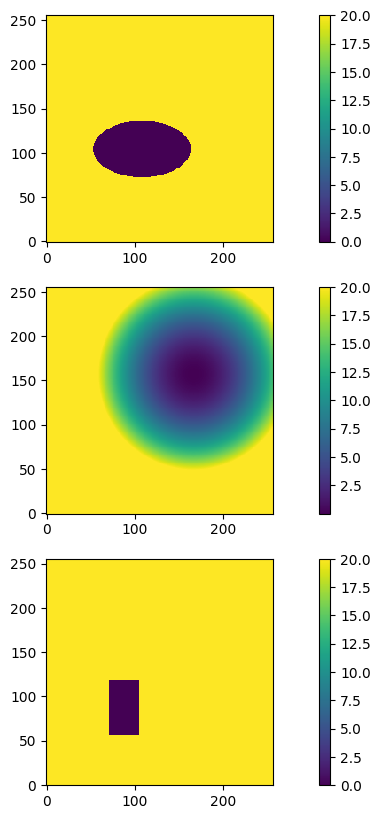

In [425]:
path_to_dataset = "./solution_template/public_tests/01_test_potentials_input/train/potentials"

chosen_ones = {'b2399918793e4228a3ea0a0a89adf11b.npz', '513d5523d14c47feb8b544138071c496.npz', 'ca9f96c404b740e3b28f583f9d9afbf8.npz'}

plt.figure(figsize=(12, 10))

def get_potential_dataset():

    global path_to_dataset

    """Return the training and testing splits of the potential dataset"""
    X, y = [], []

    plot_index = 1

    if not path_to_dataset.endswith("/"):
        path_to_dataset += "/"

    for f in os.listdir(path_to_dataset):

        npz = np.load(f'{path_to_dataset}{f}')
        data, target = npz['data'], npz['target']

        X.append(data)
        y.append(target)

        if f in chosen_ones:
            plt.subplot(len(chosen_ones), 1, plot_index)
            plt.imshow(data, origin="lower", interpolation='none')
            plt.colorbar()
            plot_index += 1
    plt.show()
    return train_test_split(np.array(X), np.array(y), random_state=42)

X_train, X_test, y_train, y_test = get_potential_dataset()



Можно увидеть, что у нас имеется три типа потенциалов: два с бесконечно крутыми стенками: квадратный и эллиптический (их значение резко меняется на 0). Также у нас имеется гармонический потенциал (красивый и круглый, он плавно спускается к своему минимуму). В местах, где потенциала нет, значение матрицы равно 20.

В глаза бросается одна проблема: матрицы у нас квадратные (каждая картинка `256 х 256`), а большинство методов машинного обучения работает с векторами-признаками. К сожалению, нам придется с этим позже разобраться. Но есть еще более крупная проблема: потенциалы находятся в "случайных" местах рисунка, и оставлять это без внимания нельзя. Но вернёмся к нашим баранам. У линейных регрессоров есть одно очень полезное свойство: после обучения мы ``из коробки`` получаем важность признаков: чем выше значение коэффициента (или абсолютное значение) стоящего у признака, тем этот признак важнее. Деревья решений не обладают столь же ``естественной`` оценкой важности признаков, однако мы всё равно можем её получить. Называется эта оценка критерием Джини: она вычисляет то, как начинают ``ошибаться`` предсказания регрессора, если исключить данный признак. Чем сильнее ошибка, тем важнее признак. К нашей радости, sklearn так же ``из коробки`` включает данные оценки признаков. Давайте попробуем воспользоваться этой функцией и посмотреть на важность признаков.

План наших действий следующий. Во-первых, мы должны преобразовать квадратные матрицы в векторы. Для простоты воспользуемся обычным reshape, что сможет гарантировать нам устойчивость преобразования. Получив вектор, мы воспользуемся методами машинного обучения и получим вектор, характеризующий важность каждого признака. Далее, с целью визуализации этого вектора важностей и возможности его сопоставления с оригинальными изображениями, воспользуемся обратным reshape в исходную размерность. Reshape работает таким образом, что если мы сделаем всё верно, то важности признаков попадут в те же пиксели, которым они соответствуют в исходных изображениях. Давайте попробуем это!

## <font color='DarkOrange'>**Задание 5 [2 балла]**</font>
**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Воспользоваться классом `PotentialTransformer` для преобразования двумерной матрицы в одномерный вектор
2. Воспользоваться классом `Pipeline`, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить `LinearSVR` из `sklearn` на этом датасете.
4. Обучить `RandomForestRegressor` из `sklearn` на этом датасете.
5. Извлеките важность признаков из обученного леса с помощью `feature_importances_`. Извлеките также коэффициенты svm через `coef_` (брать абсолютные значения необязательно).
6. Преобразуйте одномерный вектор важностей признаков в двумерную картинку таким образом, чтобы их можно было сравнивать с исходными потенциалами. Постройте рисунки важностей признаков с помощью plt.imshow. Добавьте легенду.
7. Оцените качество предсказаний через метод .predict.
8. Проанализируйте результаты. Можно ли сказать что у обоих методов получились одинаковые важности признаков? Можно ли сказать, что важность признаков отображает структуру потенциалов?

In [155]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

class PotentialTransformer:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def fit(self, x, y ):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y) :
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        return x.reshape((x.shape[0], -1))

svr_pipeline = Pipeline([('scaler', PotentialTransformer()), ('svr', LinearSVR())])
svr_pipeline.fit(X_train, y_train)
rf_pipeline = Pipeline([('scaler', PotentialTransformer()), ('rf', RandomForestRegressor())])
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler',
                 <__main__.PotentialTransformer object at 0x78c930610170>),
                ('rf', RandomForestRegressor())])

In [156]:
rf_coeffs = rf_pipeline.named_steps['rf'].feature_importances_
svr_coeffs = svr_pipeline.named_steps['svr'].coef_
rf_coeffs_2d = rf_coeffs.reshape(256, 256)
svr_coeffs_2d = svr_coeffs.reshape(256, 256)

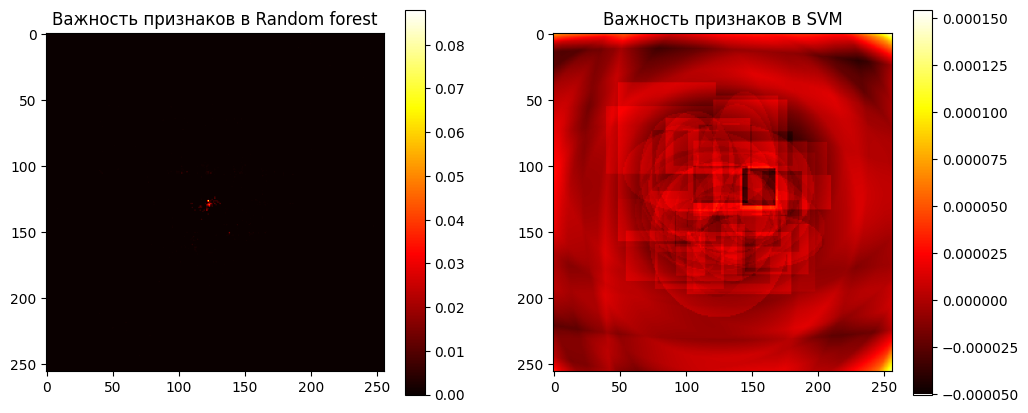

In [175]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
axis[0].imshow(rf_coeffs_2d, cmap='hot')
axis[0].set_title("Важность признаков в Random forest")
plt.colorbar(axis[0].imshow(rf_coeffs_2d, cmap='hot'), ax=axis[0])
axis[1].imshow(svr_coeffs_2d, cmap='hot')
axis[1].set_title("Важность признаков в SVM")
plt.colorbar(axis[1].imshow(svr_coeffs_2d, cmap = 'hot'), ax=axis[1])

plt.show()


In [176]:
from sklearn.metrics import mean_absolute_error
print("MAE Random Forest: {}\nMAE SVM: {}".format(mean_absolute_error(rf_pipeline.predict(X_test), y_test), mean_absolute_error(svr_pipeline.predict(X_test), y_test)))

MAE Random Forest: 0.052387512915919116
MAE SVM: 0.0747689087120819


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Можно заметить , что важности признаков абсолютно разные: важность признаков леса пректически везде равна нулю кроме некоторого числа точек, в которых она принимает небольшие значения (точечная структутра), У SVM важность признаков практически везде ненулевая.

Получается, что важность признаков не отразила структуру потенциалов ни в одном из случаев, хотя в случае с SVM их примерная форма некоторым образом запомнилась.

MAE Random Forest меньше чем у SVM, говорит о том что качество предсказаний у RF лучше



---

Если всё сделано верно, то в предыдущем задании вы должны были увидеть некоторый сумбур в коэффициентах SVM. Можно увидеть, как некоторые потенциалы "отпечатались" в признаках, т.е. метод явно запомнил ответ, не пытаясь их обобщить. Видимо, нужно каким-то образом "стандартизировать" потенциалы, чтобы было легче "обобщать" их. К примеру, можно попробовать параллельно передвигать потенциал таким образом, чтобы в центре всегда оказывалось минимальное значение (места на матрице, не заполненные потенциалами, заполняются 20). Возможно вы заметите и другие "проблемы" или найдёте более элегантные решения, которые смогут помочь Вам улучшить результат.

